# Biodiversity Dataset Analysis

### 1. Setting up libraries and data

In [1]:
# Import python libraries for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading data sets
species_info = pd.read_csv("species_info.csv")
observations = pd.read_csv("observations.csv")

In [3]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


### 2. Data exploration and cleansing

In [5]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


It appears there is no missing values in data set, however there may be anomalous or non-sensical observations yet to be explored

In [6]:
species_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


The column 'conversation_status' appears to have only 191/5824 observations. As there is well beyond 60% missing data for the column, the best way to handle the missing data is deletion.

In [7]:
# Dropping conservation_status column
species_info.drop("conservation_status", axis="columns", inplace=True)

Columns 'common_names' and 'category' can be useful for analysis of observations in 'observations' data set, so an outer join should be performed to match all data, regardless of missing values.

In [8]:
# Creating new dataframe with 'observations' and 'species_info' combined
df = pd.merge(observations, species_info, how="outer")

In [9]:
# Inspecting new dataframe
df.head(10)

,scientific_name,park_name,observations,category,common_names
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch"
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch"
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch"
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch"
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink
5,Neovison vison,Yellowstone National Park,218,Mammal,American Mink
6,Neovison vison,Bryce National Park,91,Mammal,American Mink
7,Neovison vison,Yosemite National Park,200,Mammal,American Mink
8,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum
9,Prunus subcordata,Yellowstone National Park,217,Vascular Plant,Klamath Plum


In [10]:
# No missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25632 entries, 0 to 25631
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  25632 non-null  object
 1   park_name        25632 non-null  object
 2   observations     25632 non-null  int64 
 3   category         25632 non-null  object
 4   common_names     25632 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.2+ MB


In [11]:
# Statistical summary of only numerical column
df.observations.describe()

count    25632.000000
mean       142.214693
std         69.912475
min          9.000000
25%         86.000000
50%        124.000000
75%        195.000000
max        321.000000
Name: observations, dtype: float64

We can see that there is no clear anomalous observation counts.

In [12]:
# Number of unique values for each column, if low then display what categories there are.
for col in df:
    print(f"\nThe {col} column has {len(df[col].unique())} unique values.")
    if(len(df[col].unique()) < 10):
        print(f"- The {col} column has the following categories: {df[col].unique()}\n")


The scientific_name column has 5541 unique values.

The park_name column has 4 unique values.
- The park_name column has the following categories: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Yellowstone National Park' 'Bryce National Park']


The observations column has 304 unique values.

The category column has 7 unique values.
- The category column has the following categories: ['Vascular Plant' 'Mammal' 'Bird' 'Nonvascular Plant' 'Amphibian'
 'Reptile' 'Fish']


The common_names column has 5504 unique values.


We can see there is a small amount of parks and categories for the species in the dataframe

### 3. Observations per category exploration

In [13]:
# Grouping by 'category' column to see how many total observations there is for each category
observations_per_category = df[["category", "observations"]].groupby("category").observations.sum().reset_index()

In [14]:
observations_per_category

,category,observations
0,Amphibian,45068
1,Bird,332371
2,Fish,72901
3,Mammal,163120
4,Nonvascular Plant,190653
5,Reptile,45822
6,Vascular Plant,2795312


In [15]:
# Removing Vascular Plant category for second plot with 'zoom'
observations_per_category_wo_vasc = observations_per_category.iloc[:-1, :]
observations_per_category_wo_vasc

,category,observations
0,Amphibian,45068
1,Bird,332371
2,Fish,72901
3,Mammal,163120
4,Nonvascular Plant,190653
5,Reptile,45822


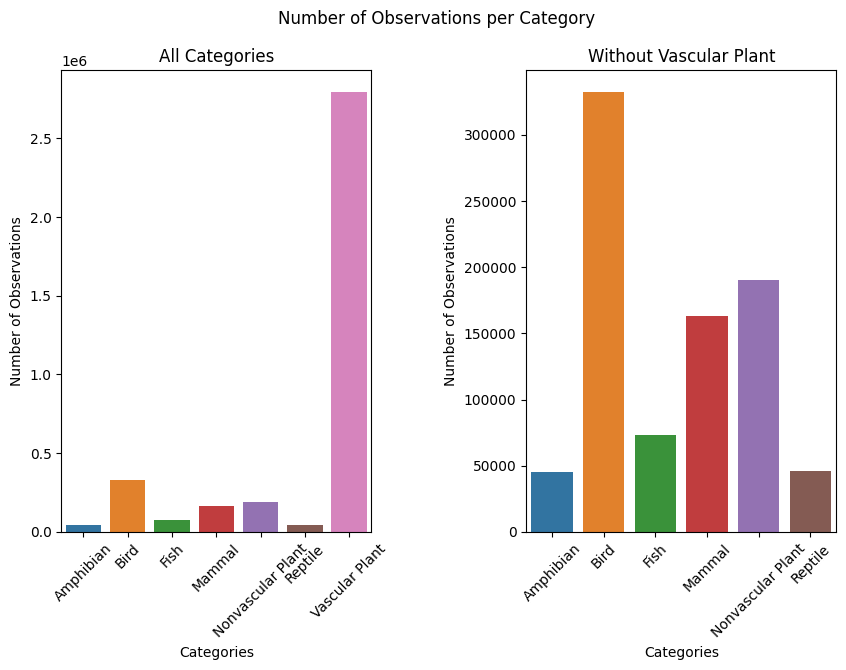

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure(figsize=(10, 6)) # Creating figure

# Creating first plot on subplot
plt.subplot(1, 2, 1) 
sns.barplot(x = observations_per_category.category, y = observations_per_category.observations) # Plotting bar graph

plt.xticks(rotation=45) # Rotation of x labels so they do not overlap

# Setting title and axis labels
plt.title("All Categories")
plt.xlabel("Categories")
plt.ylabel("Number of Observations")




 # Creating second plot on subplot
plt.subplot(1, 2, 2)
sns.barplot(x = observations_per_category_wo_vasc.category, y = observations_per_category_wo_vasc.observations) # Plotting bar graph

plt.xticks(rotation=45) # Rotation of x labels so they do not overlap

# Setting title and axis labels
plt.title("Without Vascular Plant")
plt.xlabel("Categories")
plt.ylabel("Number of Observations")

# Setting main title
plt.suptitle("Number of Observations per Category")

# Increasing space between plots 
plt.subplots_adjust(wspace=0.5)

plt.show()
plt.clf()

In [17]:
print(f"Average Number of observations per category: {observations_per_category_wo_vasc.observations.mean()}")
vascular_plant_observations = observations_per_category.observations[observations_per_category.category == "Vascular Plant"].values[0]
print(f"Vascular Plant observations: {vascular_plant_observations}")

Average Number of observations per category: 141655.83333333334
Vascular Plant observations: 2795312


From the above charts, we can see that the number of observations for the Vascular Plant category is nearly 20x greater than the average category.

### 4. Category observations per park exploration

In [18]:
# Grouping by park name and category, getting sum of observations
cat_obsv_per_park = df.groupby(["park_name", "category"]).observations.sum().reset_index()

In [19]:
# Displaying new dataframe
cat_obsv_per_park

,park_name,category,observations
0,Bryce National Park,Amphibian,7542
1,Bryce National Park,Bird,58590
2,Bryce National Park,Fish,12823
3,Bryce National Park,Mammal,28830
4,Bryce National Park,Nonvascular Plant,32992
5,Bryce National Park,Reptile,8141
6,Bryce National Park,Vascular Plant,484373
7,Great Smoky Mountains National Park,Amphibian,5876
8,Great Smoky Mountains National Park,Bird,42869
9,Great Smoky Mountains National Park,Fish,9482


C:\Users\Mateo\AppData\Local\Temp\ipykernel_2380\403223586.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  named_and_filtered = name_of_park.append(park_data) # Appending data to new dataframe
C:\Users\Mateo\AppData\Local\Temp\ipykernel_2380\403223586.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  named_and_filtered = name_of_park.append(park_data) # Appending data to new dataframe
C:\Users\Mateo\AppData\Local\Temp\ipykernel_2380\403223586.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  named_and_filtered = name_of_park.append(park_data) # Appending data to new dataframe
C:\Users\Mateo\AppData\Local\Temp\ipykernel_2380\403223586.py:10: FutureWarning: The frame.append method is deprecated and will be removed 

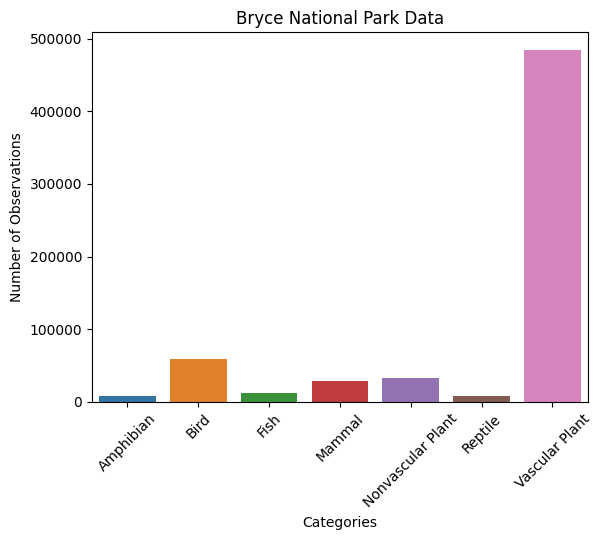

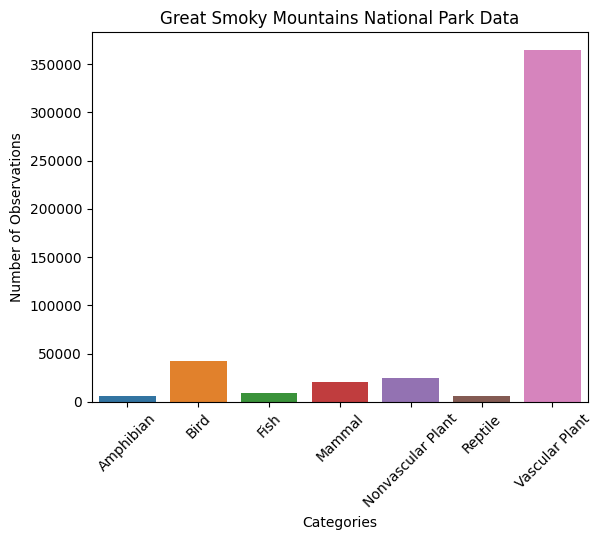

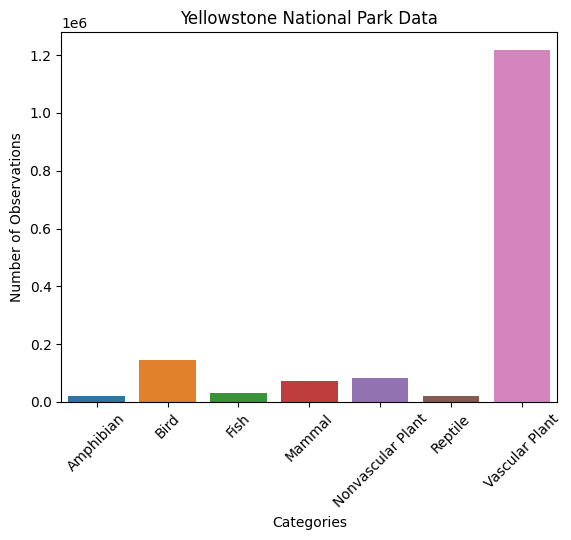

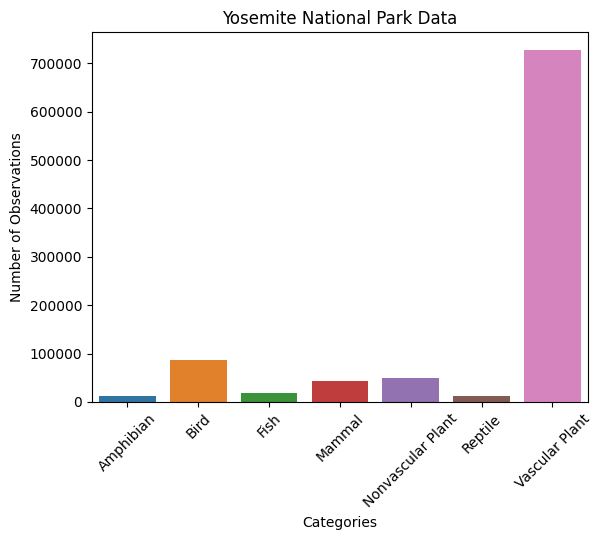

<Figure size 640x480 with 0 Axes>

In [20]:
# Dataframe filtering and splitting automation

unique_parks = cat_obsv_per_park.park_name.unique() # Get list of unique park names

filtered_dfs = [] # Empty list to be filled with filtered dfs

for name_of_park in unique_parks:
    park_data = cat_obsv_per_park[cat_obsv_per_park.park_name == name_of_park] # Filtering original df for each parks' data
    name_of_park = pd.DataFrame({}) # Empty dataframe creation 
    named_and_filtered = name_of_park.append(park_data) # Appending data to new dataframe
    filtered_dfs.append(named_and_filtered)  # Appending new dataframe to filtered_dfs list

# Plotting bargraphs for each parks' data    
for i in filtered_dfs:
    sns.barplot(data=i, x = "category", y = "observations")
    plt.title(f"{i.park_name.iloc[0]} Data")
    plt.xlabel("Categories")
    plt.ylabel("Number of Observations")
    plt.xticks(rotation=45)
    plt.show()
    plt.clf()

### 5. Specific category analysis - Bears

In [21]:
# Splitting mammal data
mammal_data = df[df.category == "Mammal"]
mammal_data.head(25)

,scientific_name,park_name,observations,category,common_names
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink
5,Neovison vison,Yellowstone National Park,218,Mammal,American Mink
6,Neovison vison,Bryce National Park,91,Mammal,American Mink
7,Neovison vison,Yosemite National Park,200,Mammal,American Mink
340,Blarina brevicauda,Bryce National Park,77,Mammal,"Northern Short Tailed Shrew, Northern Short-Ta..."
341,Blarina brevicauda,Great Smoky Mountains National Park,86,Mammal,"Northern Short Tailed Shrew, Northern Short-Ta..."
342,Blarina brevicauda,Yellowstone National Park,244,Mammal,"Northern Short Tailed Shrew, Northern Short-Ta..."
343,Blarina brevicauda,Yosemite National Park,185,Mammal,"Northern Short Tailed Shrew, Northern Short-Ta..."
380,Odocoileus virginianus,Great Smoky Mountains National Park,36,Mammal,White-Tailed Deer
381,Odocoileus virginianus,Great Smoky Mountains National Park,36,Mammal,"White-Tailed Deer, White-Tailed Deer"


In [22]:
# Getting Bear Data 
bear_data = mammal_data[mammal_data.common_names.str.contains("bear", case=False)] # Ignoring letter case

bear_data.head()

,scientific_name,park_name,observations,category,common_names
13144,Ursus arctos,Yosemite National Park,130,Mammal,"Brown Bear, Grizzly Bear"
13145,Ursus arctos,Bryce National Park,73,Mammal,"Brown Bear, Grizzly Bear"
13146,Ursus arctos,Yellowstone National Park,232,Mammal,"Brown Bear, Grizzly Bear"
13147,Ursus arctos,Great Smoky Mountains National Park,104,Mammal,"Brown Bear, Grizzly Bear"
22244,Ursus arctos horribilis,Bryce National Park,38,Mammal,Grizzly Bear


In [23]:
# Grouping bear data per park
bear_data.groupby("park_name").observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,539
1,Great Smoky Mountains National Park,398
2,Yellowstone National Park,1293
3,Yosemite National Park,849


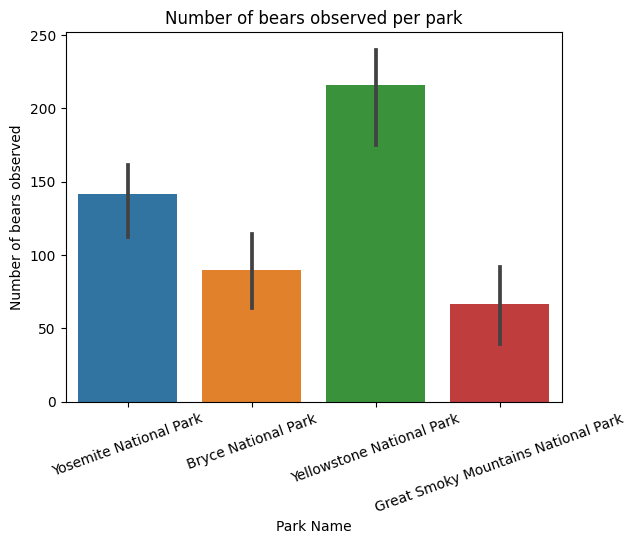

<Figure size 640x480 with 0 Axes>

In [24]:
# Plotting bear results
sns.barplot(data = bear_data, x="park_name", y = "observations")
plt.xlabel("Park Name")
plt.ylabel("Number of bears observed")
plt.xticks(rotation=20)
plt.title("Number of bears observed per park")
plt.show()
plt.clf()

We can see that the highest concentration of bears lies in the Yellowstone National Park, while the lowest lies in the Great Smoke Mountians National Park

### 6. Specific category analysis - Wolves

In [29]:
# Extracting wolf data
wolf_data = mammal_data[mammal_data.common_names.str.contains("wolf", case=False)]

In [38]:
# Making new dataset grouping by the sum of observations per park
wolves_per_park = wolf_data.groupby("park_name").observations.sum().reset_index()

In [37]:
wolves_per_park

,park_name,observations
0,Bryce National Park,420
1,Great Smoky Mountains National Park,190
2,Yellowstone National Park,1050
3,Yosemite National Park,622


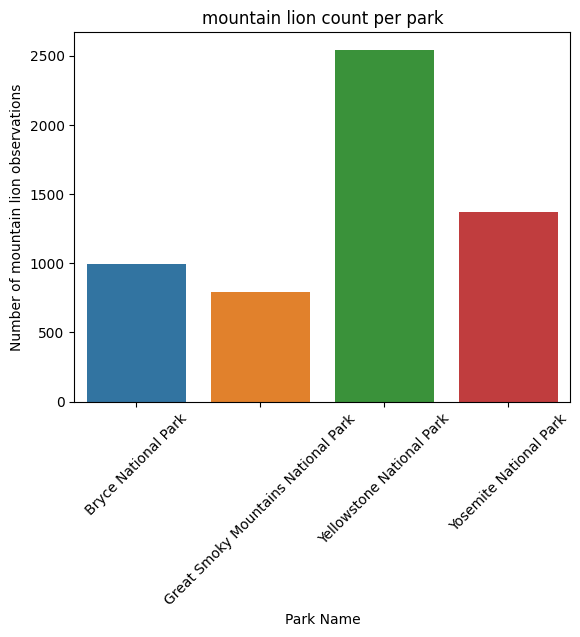

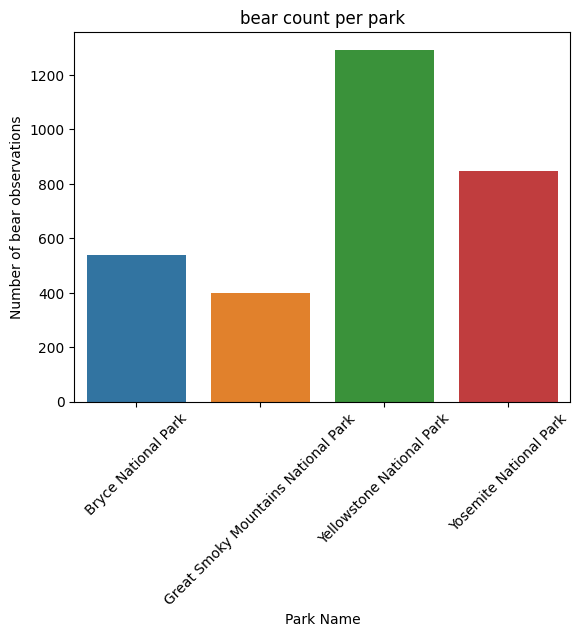

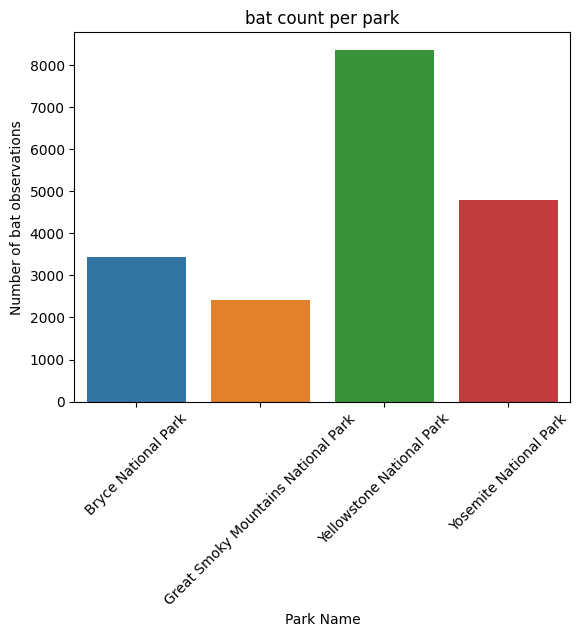

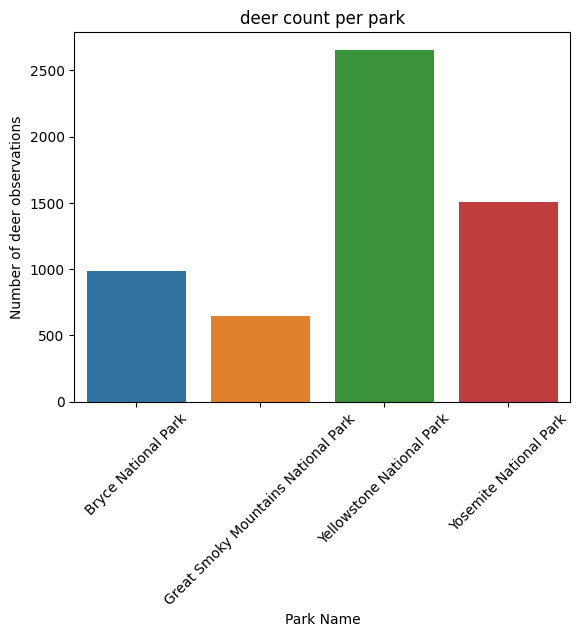

<Figure size 640x480 with 0 Axes>

In [49]:
# Same method used above, but automated in a for loop with mammals_of_interest list
mammals_of_interest = ["mountain lion", "bear", "bat", "deer"]
mammal_groupbys = []

for mammal in mammals_of_interest:
    thismammal_data = mammal_data[mammal_data.common_names.str.contains(f"{mammal}", case=False)]
    thismammal_per_park = thismammal_data.groupby("park_name").observations.sum().reset_index()
    mammal_groupbys.append(thismammal_per_park)
    sns.barplot(data = thismammal_per_park, x = "park_name", y="observations")
    plt.xlabel("Park Name")
    plt.xticks(rotation = 45)
    plt.ylabel(f"Number of {mammal} observations")
    plt.title(f"{mammal} count per park")
    plt.show()
    plt.clf()

### Conclusions

    The analysis conducted shows that the proportion of each category's frequency seems to stay relatively similar across each of the four parks given. It is important to note that this may not be a random occurrence and the data may have been collected in similar proportions on purpose, a deeper understanding of the context of the data is required to reach a consensus. Furthermore, the amount of Vascular Plant observations are consistently much more frequent than the amount of observations for the different categories. They are observed 20x more than the average category. There seems to be a trend of low observations for Reptiles, Amphibians and Fish, while Birds are more frequently observed. 
    Limited conclusions can be drawn from a basic dataset such as the one used for this exploration. More data is needed to perform a deeper, more well-rounded analysis.